In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [113]:
# Read data from the CSV file
df = pd.read_csv("honeyproduction.csv")

In [115]:
# Display the first 5 rows of the dataset
print(df.head(5))

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [117]:
# Group data by year and calculate the mean of total honey production
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


In [119]:
# Extract the year and total production data for model training
X = prod_per_year['year']
X = X.values.reshape(-1, 1)  # Reshape for sklearn compatibility
y = prod_per_year['totalprod']

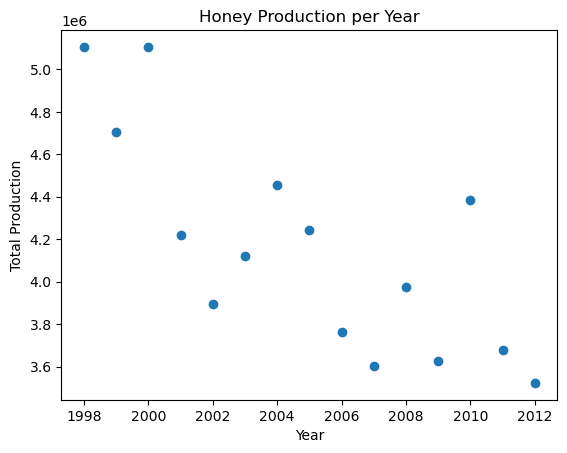

In [121]:
# Scatter plot of the actual production data
plt.scatter(X, y)
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.title("Honey Production per Year")
plt.show()

In [123]:
# Create a linear regression model and train it
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [125]:
# Predict honey production for the known years (for the training data)
y_predict = regr.predict(X)
print(y_predict)

[4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934687 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


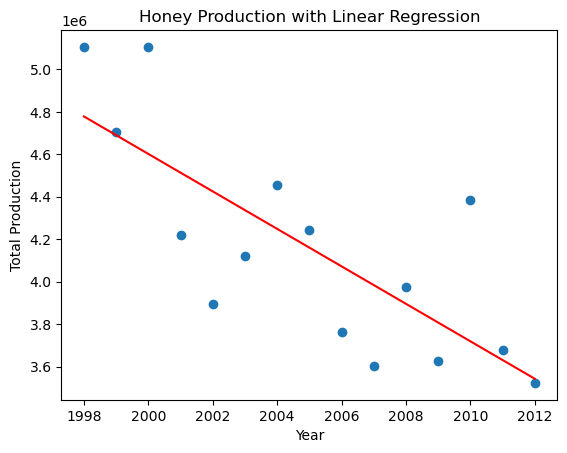

In [127]:
# Plot the actual data and the linear regression line for known data
plt.scatter(X, y)  # Scatter plot of actual data
plt.plot(X, y_predict, color='red')  # Regression line
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.title("Honey Production with Linear Regression")
plt.show()

In [129]:
# Predict future honey production (from 2013 to 2050)
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)  # Reshape for sklearn compatibility
future_predict = regr.predict(X_future)

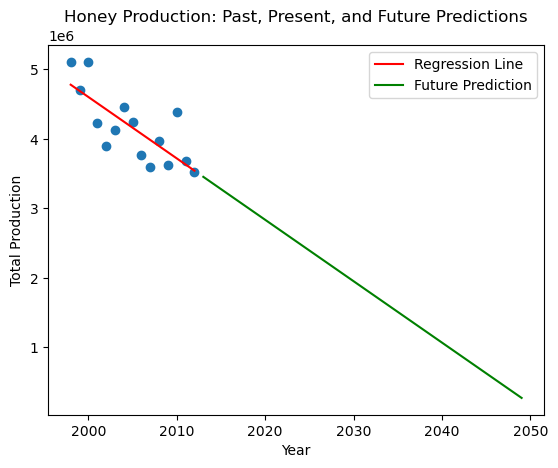

In [131]:
# Plot current predictions with future predictions on the same plot
plt.scatter(X, y)  # Scatter plot of actual data
plt.plot(X, y_predict, color='red', label="Regression Line")  # Regression line for known data
plt.plot(X_future, future_predict, color='green', label="Future Prediction")  # Prediction line for future
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.title("Honey Production: Past, Present, and Future Predictions")
plt.legend()  # Add a legend to differentiate lines
plt.show()